# Linear Regression Implementation from Scratch

In [1]:
%matplotlib inline
import d2l
from mxnet import autograd, np, npx
import random
npx.set_np()

Construct labels through:
$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$$
with $\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$.

In [2]:
def synthetic_data(w, b, num_examples):
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

Check the generated data set

features: [2.2122064 0.7740038] 
label: 6.000587


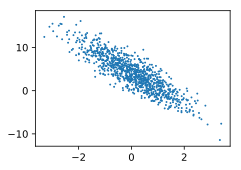

In [3]:
print('features:', features[0],'\nlabel:', labels[0])
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

Reading a mini-batch data, namely `batch_size` randomly sampled examples, each time.

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # read at random
    for i in range(0, num_examples, batch_size):
        j = min(i + batch_size, num_examples)
        batch_indices = np.array(indices[i:j])
        yield features[batch_indices], labels[batch_indices]

Check what a mini-batch looks like.

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print('X =\n%s\ny =\n%s' % (X, y))
    break

X =
[[ 1.0380163   0.8255258 ]
 [-0.23647429 -0.2963644 ]
 [-0.24017854 -0.34283012]
 [-0.48774993 -0.02261727]
 [ 0.09210896 -0.1585041 ]
 [-0.4844843   2.3336477 ]
 [-0.10980018 -0.43571743]
 [-0.26519665  1.5181851 ]
 [-1.0743258  -1.0601982 ]
 [ 0.8806273   1.9885163 ]]
y =
[ 3.4770956   4.7410684   4.876036    3.310762    4.9234405  -4.7084603
  5.450973   -1.4937832   5.6719446  -0.79267937]


Randomly initialize model parameters and attach gradients

In [6]:
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)

w.attach_grad()
b.attach_grad()

Define the model and loss function

In [7]:
def linreg(X, w, b):
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

Optimization algorithm

In [8]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

Training

In [9]:
lr, num_epochs = 0.03, 3  # Learning rate and number of data epochs
net, loss = linreg, squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
    
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)    

epoch 1, loss 0.040481
epoch 2, loss 0.000160
epoch 3, loss 0.000050
Error in estimating w [4.0352345e-04 3.6478043e-05]
Error in estimating b [0.00053549]
